In [44]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load all experiment data from a wandb project
def load_wandb_data(project_name):
    # Initialize API
    api = wandb.Api()
    
    # Fetch the project runs
    runs = api.runs(project_name)
    
    # Extract summary metrics, config, and other useful info
    summary_list = []
    config_list = []
    name_list = []
    
    for run in runs:
        # Extract run summary (metrics, etc.)
        summary = run.summary._json_dict
        # Extract config (hyperparameters, etc.)
        config = {k: v for k, v in run.config.items() if not k.startswith('_')}
        # Combine summary and config
        summary.update(config)
        summary_list.append(summary)
        name_list.append(run.name)
    
    # Create DataFrame
    df = pd.DataFrame(summary_list)
    df['run_name'] = name_list
    
    return df

# Replace with your new project path
new_project_name = "aureliengauffre/SMA_cl_best"  # Replace with your wandb project path
# Load the DataFrame
df = load_wandb_data(new_project_name)

# Display the first few rows of the DataFrame to verify
print(df.head())
df = df.rename(columns={
    'pretrained_path_epochs': 'Pretrained Epochs', 
    'worst_grp_acc_te': 'Worst Acc.',
    'best_acc_te':'Acc.',
    'name': 'Dataset'
})

#multiply  by 100 Acc.
df['Acc.'] = df['Acc.'] * 100





def replace_null_pretrained_path(df):
    """
    Replaces all null values in the pretrained_path column with 'moco'.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the pretrained_path column.

    Returns:
        pd.DataFrame: The DataFrame with updated pretrained_path values.
    """
    # Replace NaN values (null) in the 'pretrained_path' column with 'moco'
    df['pretrained_path'] = df['pretrained_path'].fillna('NONE')
    return df

# Example usage:
# Assuming df is your DataFrame
df = replace_null_pretrained_path(df)

# Check if the replacement worked
print(df['pretrained_path'].value_counts())


def determine_method(pretrained_path):
    if pd.isna(pretrained_path) or pretrained_path == 'NONE':
        return 'none'
    elif 'moco' in pretrained_path:
        return 'moco'
    elif 'simsiam' in pretrained_path:
        return 'simsiam'
    elif 'swav' in pretrained_path:
        return 'swav'
    else:
        return 'none'

df['method'] = df['pretrained_path'].apply(determine_method)
# remove Dataset plt-doc
df = df[df['Dataset'] != 'plt-doc']


      _runtime  _step    _timestamp             _wandb  best_acc_te  \
0  1255.815096   16.0  1.726673e+09  {'runtime': 1254}     0.794616   
1  1245.694182   16.0  1.726672e+09  {'runtime': 1244}     0.800557   
2  1248.760916   16.0  1.726671e+09  {'runtime': 1248}     0.786324   
3  1248.968332   16.0  1.726666e+09  {'runtime': 1247}     0.779548   
4  1246.489502   16.0  1.726664e+09  {'runtime': 1244}     0.789480   

   best_acc_va  best_mean_group_acc_te  best_mean_group_acc_va  \
0     0.781467                0.841255                0.834222   
1     0.792533                0.847218                0.845400   
2     0.780889                0.829974                0.831279   
3     0.772874                0.825473                0.821132   
4     0.782270                0.837789                0.831818   

   best_worst3_acc_te  best_worst3_acc_va  ...  weight_decay  wandb_project  \
0            0.149679            0.148760  ...         0.001         SMA_cl   
1            0.188

In [45]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_line(df, x_label, y_label, hue_label, filter_dict, title="fig", save_as_pdf=True):
    """
    Plots a line plot with the specified x, y, and hue labels, applies filters to the DataFrame,
    and optionally saves the plot as a PDF.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to plot.
        x_label (str): The column name to use for the x-axis.
        y_label (str): The column name to use for the y-axis.
        hue_label (str): The column name to use for the hue (and style).
        filter_dict (dict): A dictionary where keys are column names and values are lists of allowed values to filter.
        title (str): Optional title for the plot.
        save_as_pdf (bool): If True, saves the plot as a PDF in the ./figures directory.

    Returns:
        df (pd.DataFrame): The filtered DataFrame used in the plot.
    """
    df = df.copy()

    # Apply the filters based on the filter dictionary
    for key, values in filter_dict.items():
        df = df[df[key].isin(values)]
    print(df.method.value_counts())

    # Set the style and size of the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Create the line plot with distinct lines for each category in the hue label
    sns.lineplot(
        data=df, 
        x=x_label, 
        y=y_label, 
        hue=hue_label,
        style=hue_label, 
        markers=True,
        dashes=False
    )

    # Customize the plot with labels and title
    if title:
        plt.title(title)
    if x_label == 'alpha':
        plt.xlabel(r'$\alpha$')
    else:
        plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title=hue_label, loc='best')

    # Adjust layout
    plt.tight_layout()

    # Save the plot as a PDF if requested
    if save_as_pdf and title:
        # Ensure the directory exists
        os.makedirs('./figures', exist_ok=True)
        # Save the plot in ./figures/ with the title as the filename
        plt.savefig(f'./figures/{title}.pdf', format='pdf')

    # Show the plot
    plt.show()

    # Print the group counts for further analysis
    print(df.groupby([x_label, hue_label]).size().reset_index(name='count'))

    return df


# config B plot : nb of epochs study


moco    180
none     36
Name: method, dtype: int64


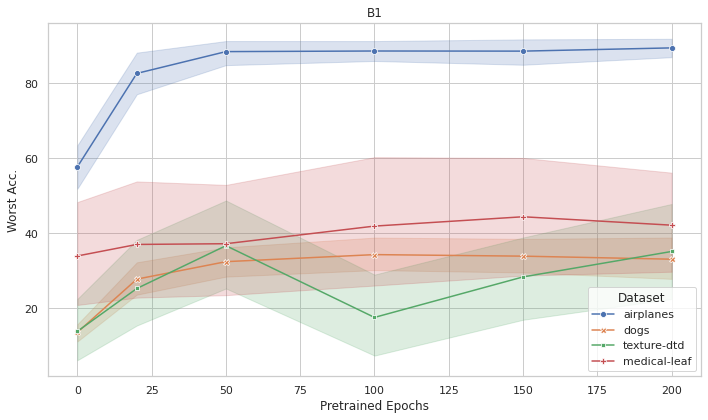

    Pretrained Epochs       Dataset  count
0                 0.0     airplanes      9
1                 0.0          dogs      9
2                 0.0  medical-leaf      9
3                 0.0   texture-dtd      9
4                20.0     airplanes      9
5                20.0          dogs      9
6                20.0  medical-leaf      9
7                20.0   texture-dtd      9
8                50.0     airplanes      9
9                50.0          dogs      9
10               50.0  medical-leaf      9
11               50.0   texture-dtd      9
12              100.0     airplanes      9
13              100.0          dogs      9
14              100.0  medical-leaf      9
15              100.0   texture-dtd      9
16              150.0     airplanes      9
17              150.0          dogs      9
18              150.0  medical-leaf      9
19              150.0   texture-dtd      9
20              200.0     airplanes      9
21              200.0          dogs      9
22         

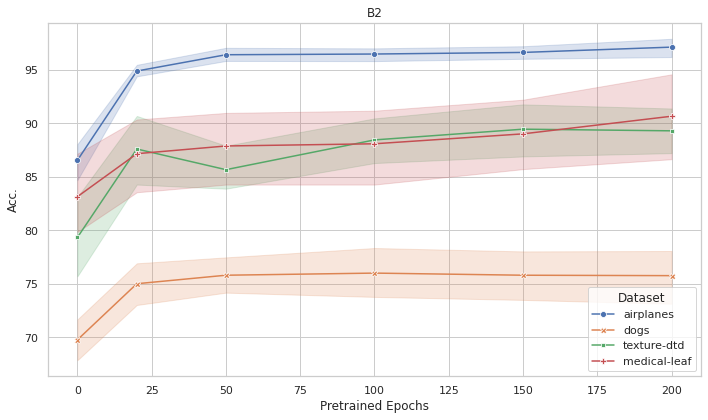

    Pretrained Epochs       Dataset  count
0                 0.0     airplanes      9
1                 0.0          dogs      9
2                 0.0  medical-leaf      9
3                 0.0   texture-dtd      9
4                20.0     airplanes      9
5                20.0          dogs      9
6                20.0  medical-leaf      9
7                20.0   texture-dtd      9
8                50.0     airplanes      9
9                50.0          dogs      9
10               50.0  medical-leaf      9
11               50.0   texture-dtd      9
12              100.0     airplanes      9
13              100.0          dogs      9
14              100.0  medical-leaf      9
15              100.0   texture-dtd      9
16              150.0     airplanes      9
17              150.0          dogs      9
18              150.0  medical-leaf      9
19              150.0   texture-dtd      9
20              200.0     airplanes      9
21              200.0          dogs      9
22         

In [49]:
filter_dict = {
    'split_seed': [30,31,32],
    'K': [2],
    'method': ['moco','none']
}


# Call the plot function for the first plot
plot1 = plot_line(
    df=df, 
    x_label='Pretrained Epochs', 
    y_label='Worst Acc.', 
    hue_label='Dataset', 
    filter_dict=filter_dict,
    title='B1'
)

# Call the plot function for the second plot
plot2 = plot_line(
    df=df, 
    x_label='Pretrained Epochs', 
    y_label='Acc.', 
    hue_label='Dataset', 
    filter_dict=filter_dict,
    title='B2'
)


# A : SupCon


none       143
moco        50
simsiam     48
swav        36
Name: method, dtype: int64


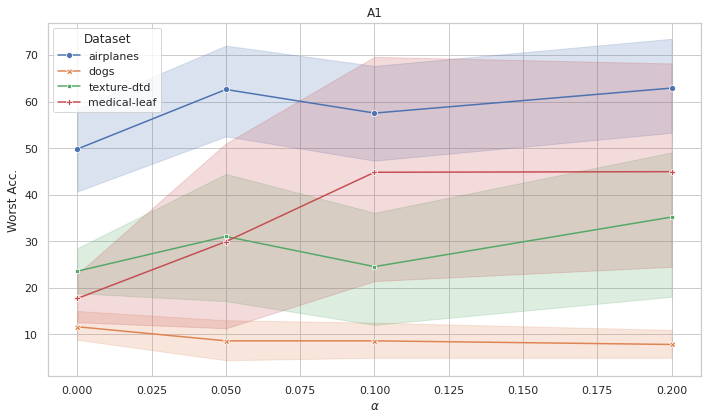

    alpha       Dataset  count
0    0.00     airplanes     42
1    0.00          dogs     48
2    0.00  medical-leaf     57
3    0.00   texture-dtd     58
4    0.05     airplanes      6
5    0.05          dogs      6
6    0.05  medical-leaf      6
7    0.05   texture-dtd      6
8    0.10     airplanes      6
9    0.10          dogs      6
10   0.10  medical-leaf      6
11   0.10   texture-dtd      6
12   0.20     airplanes      6
13   0.20          dogs      6
14   0.20  medical-leaf      6
15   0.20   texture-dtd      6
none       143
moco        50
simsiam     48
swav        36
Name: method, dtype: int64


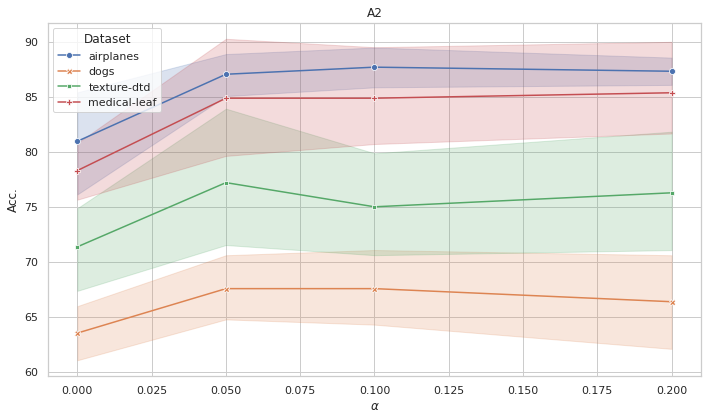

    alpha       Dataset  count
0    0.00     airplanes     42
1    0.00          dogs     48
2    0.00  medical-leaf     57
3    0.00   texture-dtd     58
4    0.05     airplanes      6
5    0.05          dogs      6
6    0.05  medical-leaf      6
7    0.05   texture-dtd      6
8    0.10     airplanes      6
9    0.10          dogs      6
10   0.10  medical-leaf      6
11   0.10   texture-dtd      6
12   0.20     airplanes      6
13   0.20          dogs      6
14   0.20  medical-leaf      6
15   0.20   texture-dtd      6


In [50]:
filter_dict = {
    'split_seed': [6,7,8,9],
    'K': [2],
}


# Call the plot function for the first plot
plot1 = plot_line(
    df=df, 
    x_label='alpha', 
    y_label='Worst Acc.', 
    hue_label='Dataset', 
    filter_dict=filter_dict,
    title='A1'
)

# Call the plot function for the second plot
plot2 = plot_line(
    df=df, 
    x_label='alpha', 
    y_label='Acc.', 
    hue_label='Dataset', 
    filter_dict=filter_dict,
    title='A2'
)


In [51]:
# filter_dict = {
#     'filter': ['A']
# }


# # Call the plot function for the first plot
# plot1 = plot_line(
#     df=df, 
#     x_label='alpha', 
#     y_label='Worst Acc.', 
#     hue_label='method', 
#     filter_dict=filter_dict
# )

# # Call the plot function for the second plot
# plot2 = plot_line(
#     df=df, 
#     x_label='alpha', 
#     y_label='Acc.', 
#     hue_label='method', 
#     filter_dict=filter_dict
# )